# Project: Fake News Detection

We choose the topic Fake News Detection. Fake news detection is a critical process aimed at identifying and mitigating the spread of false information through various media channels, essential for preserving informed public opinion and preventing social and political manipulations. This project focuses on classifying news articles as reliable or unreliable by analyzing their content and sources, highlighting the importance of accurate information in decision-making processes.

In part 1, we descripte features of the dataset and clean the dataset. 

In part 2, we use 3 models to train and test the data, including the Decision Tree, Logistic regression and Bi-directional Long Short-Term Memory. 

In part 3, we compare the models and conclude the result.

In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt

# Part I: Data Exploration & Preparing

In [2]:
df = pd.read_csv('./data/newsinfo.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

We find there are missing values in title, auther and text, so we drop the missing value row.

In [5]:
# 
df.dropna(subset=['title', 'author', 'text'], inplace=True)
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


After drop the missing value, we use some approach to correct format the value. And we output a new file called newsinfo_filter.

In [19]:
def dec_data(df):
    """
    filter the data and save it to a new csv file
    """
    filtered_df = df[df['label'].isin([0, 1])]
    filtered_df = filtered_df[filtered_df['text'].str.len() >= 5]
    filtered_df = filtered_df[~filtered_df['text'].str.startswith(('=', 'http'))]    
    filtered_df.to_csv("./data/newsinfo_filter.csv", index=False)
    print(filtered_df.head(4))

dec_data(df)

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  


After format the value, we explore 3 features of the data set, including the average text length, total sentences and the top-30 words.

In [21]:
from collections import Counter
def count_punctuation(text):
    """
    Count the number of punctuation marks in a text
    """ 
    # use regular expressions to count the number of punctuation marks in a text
    punctuation_count = len(re.findall(r'[.!?]', text))  
    return punctuation_count 

def des():
    """
    Describe the data use average text length, total sentence, and top 30 words
    """
    data=pd.read_csv("./data/newsinfo_filter.csv")
    # calculate the average text length
    lengths = data['text'].str.len()
    average_length = lengths.mean()    
    print(f"Average text length: {average_length}", "\n")

    # calculate the total number of sentences
    total_sentence = data['text'].apply(count_punctuation).sum()
    print(f"total sentence: {total_sentence}", "\n")

    # count the frequency of each word in the text column
    texts = ' '.join(data['text'].tolist())    
    words = re.findall(r'\b\w+\b', texts.lower())   
    # use the Counter class to count the frequency of each word  
    word_counts = Counter(words)  
    top_30_words = word_counts.most_common(30)
    print(f"top_30_words:")    
    for index, (word, count) in enumerate(top_30_words, start=1):
        print(f"{index}: {word}: {count}")
des()

Average text length: 4819.459737261584 

total sentence: 872099 

top_30_words:
1: the: 858402
2: to: 397357
3: of: 388648
4: and: 357067
5: a: 346154
6: in: 290728
7: that: 204137
8: s: 164063
9: is: 145096
10: for: 135609
11: on: 122600
12: it: 117015
13: he: 97924
14: was: 96125
15: with: 95933
16: as: 92557
17: said: 77450
18: i: 73433
19: by: 72963
20: at: 69346
21: are: 68282
22: have: 67461
23: be: 66563
24: his: 66384
25: mr: 66045
26: not: 64799
27: from: 64253
28: this: 63525
29: they: 61145
30: has: 59952


In the top-30 words, we find that most of the words are stop words. So we download the stopword and move them from the text. We also move the punctuation marks from the text. After that, we token the sentences and make it to be a column called token. Finally we output a new file called train_token, this is the file we will use in the following analysis. We finishe data clean and preparetion in this step.

In [20]:
nltk.download('stopwords')
nltk.download('punkt')

def seg_sentence(text):
    """
    Takes a text and returns a text with stopwords removed
    """
    text = str(text)
    # Define the pattern for unwanted characters and remove them from the text
    pattern = u'[\\s\\d,.<>/?:;\"[\\]{}()\\|~!\t"@#$%^&*\\-_=+。\n《》、？：；“”‘’｛｝【】（）…￥！—┄－]+'
    sentence = re.sub(pattern, ' ', text)
    # Get list of stopwords and tokenize the sentence
    list_stopWords = set(stopwords.words('english'))
    list_words = word_tokenize(sentence)
    # Remove stopwords from the list of words
    filtered_words = [w for w in list_words if w not in list_stopWords]
    result = ' '.join(filtered_words)
    return result


def process_and_save_data(filepath):
    """
    Reads a csv file, processes the text column and saves the result in a new csv file
    """
    df = pd.read_csv(filepath)
    df['token'] = df['text'].apply(seg_sentence)
    df.to_csv("./data/newsinfo_token.csv", index=False)
    print(df.head(4))

process_and_save_data('./data/newsinfo_filter.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qihui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qihui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   

                                               token  
0  House Dem Aide We Didn Even See Comey Letter U...  
1  Ever get feeling life circles roundabout rathe...  
2  Why Truth Might Get You Fired October The tens...  
3  Videos Civilians Killed In Single US Airstrike...  


We split the dataset into 70%/10%/20% for training/validation/test sets.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


def t_t_v(X, y):
    """
    Takes the features and labels and splits them into training, validation and test sets
    """
    # Split the dataset into training and test sets in a 7:3 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)
    
    # Further split the test set into validation and test sets, at a ratio of 0.66 to 0.34
    X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.66, shuffle=True, stratify=y_test, random_state=42)
    
    return X_train, X_test, X_valid, y_train, y_test, y_valid


def train_test_valid(ty):
    """
    Reads the tokenized data and returns the training, validation and test sets
    """

    data = pd.read_csv('./data/newsinfo_token.csv')
    X = data['token'].values.astype(str)
    y = data['label'].values
    if ty == 1:
        tfidf = TfidfVectorizer(decode_error='replace', encoding='utf-8')
        X1 = tfidf.fit_transform(X.astype('U'))
        X_train, X_test, X_valid, y_train, y_test, y_valid = t_t_v(X1, y)
    else:
        X_train, X_test, X_valid, y_train, y_test, y_valid = t_t_v(X, y)
        # Use Tokenizer class and pad_sequences function for text preprocessing.
        max_words = 6000  # Number of words
        max_len = 100  # Set length based on specifics
        tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
        tokenizer.fit_on_texts(X_train)
        X_train_seq = tokenizer.texts_to_sequences(X_train)
        X_test_seq = tokenizer.texts_to_sequences(X_test)
        X_valid_seq = tokenizer.texts_to_sequences(X_valid)
        X_train = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
        X_test = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')
        X_valid = pad_sequences(X_valid_seq, maxlen=max_len, padding='post', truncating='post')

    return X_train, X_test, X_valid, y_train, y_test, y_valid

# Part II: Model Building & Evaluation

## Model 1: Decision Tree

We choose the decison tree as our first model, there are two reasons:

1. **High Interpretability**: Decision tree provide a clear and logical decision-making process, making it easier to understand how predictions are made.

2. **Capability to Handle Non-linear Data**: Decision tree can effectively handle complex and non-linear relationships found in diverse news content, making them suitable for differentiating real from fake news.

We use different max_depth to train the model, reason:

1. **Prevent Overfitting**: A deeper tree (higher max_depth) can capture more detailed data specificity, leading to overfitting where the model performs well on training data but poorly on unseen data.

2. **Avoid Underfitting**: A shallower tree (lower max_depth) might not capture sufficient patterns and relationships, resulting in underfitting where the model is too simple to capture the underlying structure of the data, leading to poor performance both on training and unseen data.

In the decision tree, we test different max_depth and find that when max_depth=9, we will get the best performance. (Since the binary classification, the line of accuracy score is covered by the F1_score, so we can't see the accuracy line directly.) So we use max_depth=9 on the test set. (At first, we didn't define the value of max_depth, and we find that the best performance has 63 layers. We think there is a overfitting if we don't define the value of max_depth and we need a tradeoff. As a result we use max_depth=9 and get a very close accuracy with the max_depth=63.)

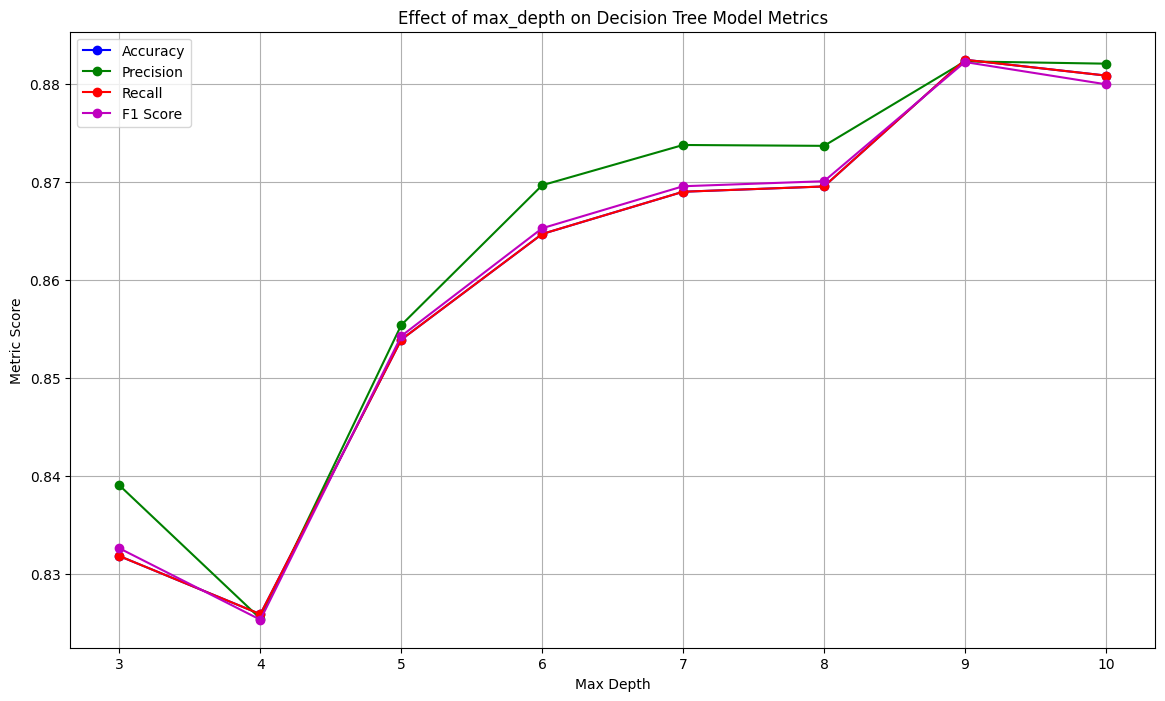

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Assuming train_test_valid function splits data properly
X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid(1)

# Define the max_depth values
depths = [3, 4, 5, 6, 7, 8, 9, 10]

# To store the metrics
accuracies_1 = []
precisions_1 = []
recalls_1 = []
f1_scores_1 = []

# Train the model with different max_depth values and calculate the metrics
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    accuracies_1.append(accuracy_score(y_valid, y_pred))
    precisions_1.append(precision_score(y_valid, y_pred, average='weighted'))
    recalls_1.append(recall_score(y_valid, y_pred, average='weighted'))
    f1_scores_1.append(f1_score(y_valid, y_pred, average='weighted'))

# Plot the metrics against max_depth values
plt.figure(figsize=(14, 8))

plt.plot(depths, accuracies_1, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(depths, precisions_1, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(depths, recalls_1, marker='o', linestyle='-', color='r', label='Recall')
plt.plot(depths, f1_scores_1, marker='o', linestyle='-', color='m', label='F1 Score')

plt.title('Effect of max_depth on Decision Tree Model Metrics')
plt.xlabel('Max Depth')
plt.ylabel('Metric Score')
plt.grid(True)
plt.xticks(depths)
plt.legend()
plt.show()

In [23]:
# Train the model with the max_depth value = 9
model_1 = DecisionTreeClassifier(max_depth=9)
model_1.fit(X_train,  y_train)

# Predict the labels of the test set
y_md1_pred2 =  model_1.predict(X_test)

print('Decision tree-test-accuracy  :  {0:0.4f}'.format(accuracy_score(y_test,  y_md1_pred2)))
print("Decision tree-test-precision  :", round(precision_score(y_test, y_md1_pred2, average='weighted'), 4))
print("Decision tree-test-recall  :", round(recall_score(y_test, y_md1_pred2, average='weighted'), 4))
print("Decision tree-test-f1:  :", round(f1_score(y_test, y_md1_pred2, average='weighted'), 4))

Decision tree-test-accuracy  :  0.8795
Decision tree-test-precision  : 0.8794
Decision tree-test-recall  : 0.8795
Decision tree-test-f1:  : 0.8792


## Model 2: Logistic regression

We choose logistic regression as our second model. There are 3 reasons:

1. **Simplicity and Efficiency**: Logistic Regression is straightforward and computationally efficient, making it easy to implement and fast to train on large datasets typical of news content.

2. **Probabilistic Interpretation**: Logistic Regression provides probabilities for its predictions, offering a clear threshold to distinguish between classes (real or fake). This is particularly useful for news verification, where understanding the degree of certainty in predictions can be crucial.

3. **Feature Importance**: Logistic Regression allows easy interpretation of the impact of each feature (e.g., words or phrases in news articles). This helps in identifying key indicators of falsehood in news articles, such as sensational words or biased phrases.

We use differen C_value to find the best performance of logistic regression, since C_value is an important hyperparameters fo the logistical regression:

1. Increasing the C_value (reduces regularization) may cause the model to overfit by focusing too much on the details in the training data, thus performing better on the training set but potentially worse on new or unseen data.

2. Decreasing the C_value (increases regularization) helps to simplify the model, reducing overfitting on the training data. However, this might prevent the model from learning effective patterns in the data, thereby affecting overall performance.

The result show that when C_value=10, we can get the best performance of logistic regression. (Since the binary classification, the line of accuracy score is covered by the F1_score, so we can't see the accuracy line directly.) And we apply C_value=10 to the test set.

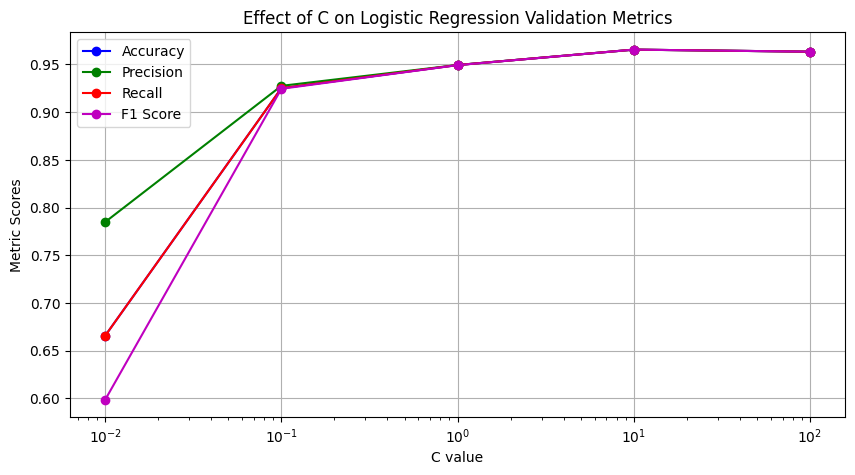

In [31]:
from sklearn.linear_model import LogisticRegression

# Define the C values
C_values = [0.01, 0.1, 1, 10, 100]

accuracies_2 = []
precisions_2 = []
recalls_2 = []
f1_scores_2 = []

# Train the model with different C values and calculate the accuracy
for c in C_values:
    model_2 = LogisticRegression(C=c)
    model_2.fit(X_train, y_train)
    y_md2_pred1 = model_2.predict(X_valid)

    # Use y_pred_valid for metric calculations
    accuracies_2.append(accuracy_score(y_valid, y_md2_pred1))
    precisions_2.append(precision_score(y_valid, y_md2_pred1, average='weighted'))
    recalls_2.append(recall_score(y_valid, y_md2_pred1, average='weighted'))
    f1_scores_2.append(f1_score(y_valid, y_md2_pred1, average='weighted'))

# Plot the metrics against C values
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracies_2, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(C_values, precisions_2, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(C_values, recalls_2, marker='o', linestyle='-', color='r', label='Recall')
plt.plot(C_values, f1_scores_2, marker='o', linestyle='-', color='m', label='F1 Score')

plt.title('Effect of C on Logistic Regression Validation Metrics')
plt.xlabel('C value')
plt.ylabel('Metric Scores')
plt.xscale('log')  # Set x-axis to log scale
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# test the model with C=10
model_2 =  LogisticRegression(C=10)
model_2.fit(X_train,  y_train)

# Predict the labels of the test set
y_md2_pred2 =  model_2.predict(X_test)

print('Logistic-test-accuracy  :  {0:0.4f}'.format(accuracy_score(y_test,  y_md2_pred2)))
print("Logistic-test-precision  :", round(precision_score(y_test, y_md2_pred2, average='weighted'), 4))
print("Logistic-test-recall  :", round(recall_score(y_test, y_md2_pred2, average='weighted'), 4))
print("Logistic-test-f1:  :", round(f1_score(y_test, y_md2_pred2, average='weighted'), 4))

Logistic-test-accuracy  :  0.9681
Logistic-test-precision  : 0.9681
Logistic-test-recall  : 0.9681
Logistic-test-f1:  : 0.9681


## Model 3: Bi-directional Long Short-Term Memory (BiLSTM)

We choose BiLSTM as the third model, reasons:

1. **Contextual Understanding**: BiLSTM can process text from both forward and backward directions, enhancing the understanding of context and improving detection accuracy.
   
2. **Handling Sequential Data**: BiLSTM is well-suited for sequential data like text, where the order and structure of words are crucial for understanding content.

3. **Robustness to Noise and Variability**: The bidirectional nature of BiLSTM helps them to be more resilient against the variability and noise often found in textual data.

4. **Feature Learning**: BiLSTM can automatically learn complex features from raw text, reducing the need for manual feature engineering and making the model highly adaptable.

We try different lstm_units, reasons:

1. **Capacity Control**: Increasing the number of units enhances the BiLSTMs's ability to learn complex patterns, improving its analytical capacity.

2. **Balancing Performance**: The optimal number of units helps achieve a balance between underfitting and overfitting.

3. **Impact on Model Depth and Complexity**: Adjusting the number of units directly affects the BiLSTMs's depth and computational complexity, impacting its ability to process complex sequential information.

We find when lstm_units=32, the BiLSTM has the best peoformance. So we apply lstm_units=32 to the test set. (Since the binary classification, the line of accuracy score is covered by the F1_score, so we can't see the accuracy line directly.)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step


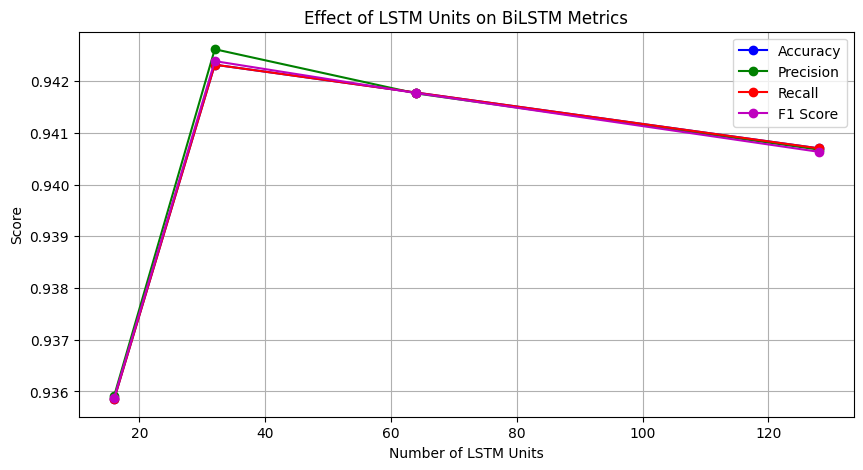

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# Parameters
embeddings = 50   # Dimensionality of the embedding vector
batch_size = 500  # Batch size for training
epochs = 10       # Number of training epochs
learning_rate = 0.001   # Learning rate
dense = 4
max_words = 6000
lstm_units = [16, 32, 64, 128]

# Load data
X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid(2)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for lstmnum in lstm_units:
    # Build the model
    model_3 = Sequential()
    model_3.add(Embedding(max_words, embeddings))
    model_3.add(Bidirectional(LSTM(lstmnum, dropout=0.5, recurrent_dropout=0.5)))
    model_3.add(Dense(dense, activation='relu'))  # Fully connected layer
    model_3.add(Dense(2, activation='softmax'))  # Output layer for classification
    model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

    # Train the model
    model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    # Validate the model
    y_md3_pred1 = model_3.predict(X_valid)
    y_md3_pred1 = np.argmax(y_md3_pred1, axis=1)  # Correcting prediction handling for softmax output

    # Evaluate the model
    acc = accuracy_score(y_valid, y_md3_pred1)
    prec = precision_score(y_valid, y_md3_pred1, average='weighted')
    rec = recall_score(y_valid, y_md3_pred1, average='weighted')
    f1 = f1_score(y_valid, y_md3_pred1, average='weighted')

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

plt.figure(figsize=(10, 5))
plt.plot(lstm_units, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(lstm_units, precisions, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(lstm_units, recalls, marker='o', linestyle='-', color='r', label='Recall')
plt.plot(lstm_units, f1_scores, marker='o', linestyle='-', color='m', label='F1 Score')
plt.title('Effect of LSTM Units on BiLSTM Metrics')
plt.xlabel('Number of LSTM Units')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
embeddings = 50
batch_size = 500
epochs = 10
learning_rate = 0.001
dense=4    
max_words = 6000
lstmnum=32

# use the best LSTM units of 32
model_3 = Sequential()
model_3.add(Embedding(max_words,embeddings))
model_3.add(Bidirectional(LSTM(lstmnum, dropout=0.5, recurrent_dropout=0.5)))
model_3.add(Dense(dense, activation='relu'))
model_3.add(Dense(2, activation='softmax'))
model_3.compile(loss='sparse_categorical_crossentropy', # loss function
             optimizer='adam', # optimizer
             metrics=['acc']) # metric to monitor

model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

y_md3_pred2 =  model_3.predict(X_test)
y_md3_pred2 = np.argmax((y_md3_pred2 > 0.5).astype(int),axis=1)

print('BILIST-test-accuracy  :  {0:0.4f}'.format(accuracy_score(y_test,  y_md3_pred2)))
print("BILIST-test-precision  :", round(precision_score(y_test, y_md3_pred2, average='weighted'), 4))
print("BILIST-test-recall  :", round(recall_score(y_test, y_md3_pred2, average='weighted'), 4))
print("BILIST-test-f1:  :", round(f1_score(y_test, y_md3_pred2, average='weighted'), 4))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - acc: 0.5877 - loss: 0.6843
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 541ms/step - acc: 0.7337 - loss: 0.5984
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 646ms/step - acc: 0.8574 - loss: 0.3866
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 707ms/step - acc: 0.8790 - loss: 0.3175
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 735ms/step - acc: 0.8961 - loss: 0.2622
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 725ms/step - acc: 0.9251 - loss: 0.1992
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 709ms/step - acc: 0.9397 - loss: 0.1665
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 742ms/step - acc: 0.9482 - loss: 0.1427
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 701ms/step - acc: 0.9589 - loss: 0.1217
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 695ms/step - acc: 0.9622 - loss: 0.1104
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
BILIST-test-accuracy  :  0.9356
BILIST-test-precision  : 0.9356
BILIST-test-recall  : 0.9356
BILIST-test-f1:  : 0.9356


## ensemble models

We didn't use ensemble models in this analysis, there are some ensemble models might suitable for this analysis.

1. **Bagging (Bootstrap Aggregating)**: Random Forest for decision trees, or Bootstrap Aggregated LSTM where multiple LSTM models are trained on different subsets of the data and the predictions are averaged.
   
2. **Boosting**: AdaBoost with decision trees or Gradient Boosting Machines (GBM) where decision trees are incrementally trained to correct errors of previous trees.

3. **Stacking**: Stacking Classifier where predictions from Decision Tree, Logistic Regression, and LSTM models serve as inputs to a higher-level classifier (like a Logistic Regression or another Decision Tree) that makes the final decision.

**Pros of Using Ensemble Models**

1. **Improved Accuracy**: Combining multiple models generally leads to better performance as they can capture more complexities and nuances in the data than a single model.

2. **Reduced Risk of Overfitting**: Especially with bagging and boosting, as these methods focus on building several smaller, simpler models (base learners) that collectively cover the decision space more effectively.

3. **Strength in Diversity**: Different models may excel at catching different types of fake news based on linguistic styles, falsification methods, or content type. Ensemble methods use this diversity to enhance overall detection capabilities.

**Cons of Using Ensemble Models**

1. **Increased Computational Cost**: Training multiple models is computationally more expensive than training a single model, requiring more memory and processing power.

2. **Complexity in Implementation**: Designing and tuning ensemble systems can be complex as it involves coordinating multiple models, choosing the right ensemble strategy, and tuning multiple hyperparameters.

3. **Interpretability Issues**: Ensemble models, particularly boosting and stacking, can be harder to interpret compared to simpler, single models due to the intertwined decision processes.

# Part III: Conclusions

**compare the result**

Besed on the result above, Logistic Regression has the best performaces in accuracy and calculate time, but BiLSTM maybe has a better performace in more complex analysis:

1. **From the accuracy aspect**: the Logistic Regression has the best performance, the next is BiLSTM and the last one is Decision Tree.
- **Logistic Regression**: While effective initially, Logistic Regression may plateau in performance improvements over additional epochs compared to BiLSTM, as it lacks the capacity to model the intricate relationships that can be captured by deeper, sequential network architectures.
- **BiLSTM**: As the number of epochs increases, the BiLSTM model likely improves at learning the temporal dependencies and contextual patterns in the data, which enhances its predictive accuracy, potentially surpassing simpler models as it fine-tunes its complex parameters over more iterations.
- **Decision Tree**: The Decision Tree model's performance might not significantly improve with more training cycles (epochs), as its methodology is generally less adaptive to complex data patterns and more prone to overfitting, especially without changes in tree complexity or pruning strategies.

2. **From calculate time**: BiLSTM cost the longest time to compute, the next is Decision Tree and the last one is Logistic Regression.
- **BiLSTM**: BiLSTMs often require more computation time due to their complex architecture involving sequential processing through time, a larger number of parameters from bidirectional layers, and limited opportunities for parallel processing, which intensifies the computational demands, especially if not optimized with GPU acceleration.
- **Decision Tree**: Decision Trees generally compute faster as they involve straightforward node-splitting operations, but deep trees or large datasets can still significantly increase computation time.
- **Logistic Regression**: Despite its simpler model structure, Logistic Regression may take longer to compute, particularly on large or high-dimensional datasets, because its optimization processes, like gradient descent, can be computationally intensive.

**limitations of the data**

1. **Data Quality**: Data collected might be biased towards certain topics, political views, or demographics, which can skew the model's understanding and detection capabilities.

2. **Data Quantity**: Especially for supervised learning, an adequate number of labeled examples (both real and fake news articles) is crucial. Insufficient data can prevent the model from learning effectively, leading to poor generalization on new, unseen data.

3. **Complexity of Language**: Detecting sarcasm or irony in text is a challenging task even for sophisticated NLP models, as they require not just linguistic cues but also contextual and common-sense knowledge.

**further investigate**

1. **Experiment with Advanced Models**: Explore more complex architectures like Transformer models which have shown promising results in NLP tasks. For online news platforms, incorporate temporal dynamics to track the evolution of news stories over time, potentially using recurrent neural networks or attention mechanisms.

2. **Implement Ensemble Techniques**: Use a stacking approach where predictions from various models serve as input to a higher-level model that makes the final decision. Blend predictions from multiple models using techniques like weighted averages where weights are assigned based on validation set performance.

3. **Cross-Validation and Hyperparameter Tuning**: Employ k-fold cross-validation to assess model robustness and avoid overfitting. Use grid search or Bayesian optimization techniques to find optimal settings for each model's parameters.
